# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

# Read Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Info

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

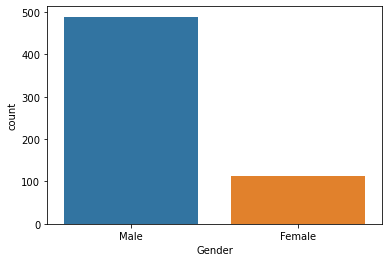

In [5]:
sns.countplot(x='Gender',data=train_data)

In [6]:
train_data['Gender'][train_data['Gender'].isnull()]='Male'

<ipython-input-6-fe9222d59902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gender'][train_data['Gender'].isnull()]='Male'


<AxesSubplot:xlabel='Married', ylabel='count'>

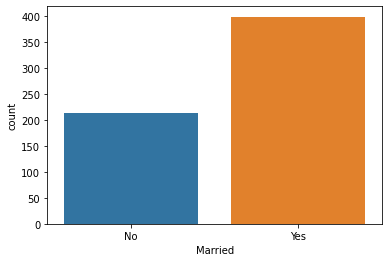

In [7]:
sns.countplot(x='Married',data=train_data)

In [8]:
train_data['Married'][train_data['Married'].isnull()]='Yes'

<ipython-input-8-c7bc0e47bc64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Married'][train_data['Married'].isnull()]='Yes'


In [9]:
train_data['LoanAmount'][train_data['LoanAmount'].isnull()]= train_data['LoanAmount'].mean()

<ipython-input-9-f826ecb60208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LoanAmount'][train_data['LoanAmount'].isnull()]= train_data['LoanAmount'].mean()


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

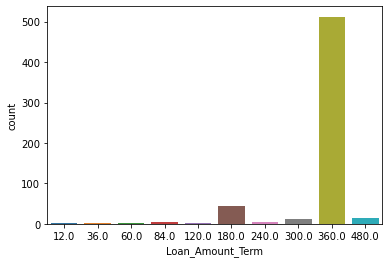

In [10]:
sns.countplot(x='Loan_Amount_Term',data=train_data)

In [11]:
train_data['Loan_Amount_Term'][train_data['Loan_Amount_Term'].isnull()]='360'

<ipython-input-11-b9a0130bc779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Loan_Amount_Term'][train_data['Loan_Amount_Term'].isnull()]='360'


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

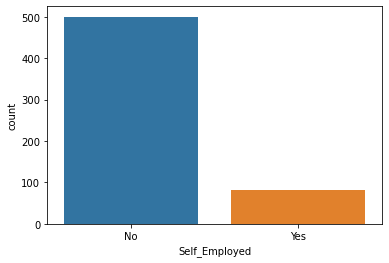

In [12]:
sns.countplot(x='Self_Employed',data=train_data)

In [13]:
train_data['Self_Employed'][train_data['Self_Employed'].isnull()]='No'

<ipython-input-13-810abee6320f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Self_Employed'][train_data['Self_Employed'].isnull()]='No'


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

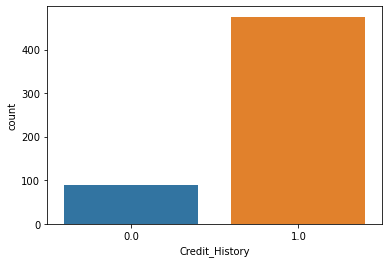

In [14]:
sns.countplot(x='Credit_History',data=train_data)

In [15]:
train_data['Credit_History'][train_data['Credit_History'].isnull()]='1'

<ipython-input-15-6f4cc4666a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_History'][train_data['Credit_History'].isnull()]='1'


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='Dependents', ylabel='count'>

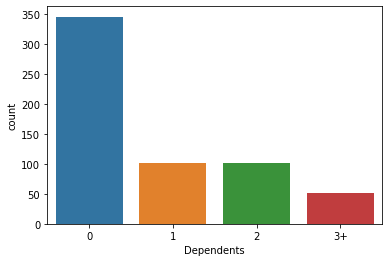

In [17]:
sns.countplot(x='Dependents',data=train_data)

In [18]:
train_data['Dependents'][train_data['Dependents'].isnull()]='0'

<ipython-input-18-89f610769996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Dependents'][train_data['Dependents'].isnull()]='0'


In [19]:
train_data.loc[train_data.Dependents=='3+','Dependents']= 4

In [20]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [21]:
train_data.loc[train_data.Loan_Status=='N','Loan_Status']= 0
train_data.loc[train_data.Loan_Status=='Y','Loan_Status']=1

In [22]:
train_data.loc[train_data.Gender=='Male','Gender']= 0
train_data.loc[train_data.Gender=='Female','Gender']=1

In [23]:
train_data.loc[train_data.Married=='No','Married']= 0
train_data.loc[train_data.Married=='Yes','Married']=1

In [24]:
train_data.loc[train_data.Education=='Graduate','Education']= 0
train_data.loc[train_data.Education=='Not Graduate','Education']=1

In [25]:
train_data.loc[train_data.Self_Employed=='No','Self_Employed']= 0
train_data.loc[train_data.Self_Employed=='Yes','Self_Employed']=1

In [26]:
property_area= pd.get_dummies(train_data['Property_Area'],drop_first=True)

In [27]:
train_data= pd.concat([train_data,property_area],axis=1)

In [28]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1


# Data Modeling

In [29]:
X= train_data.drop(['Loan_ID','Property_Area','Loan_Status'],axis=1)
y = train_data['Loan_Status']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
prediction= logmodel.predict(X_test)

In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



# Visulaization of Test data

In [33]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

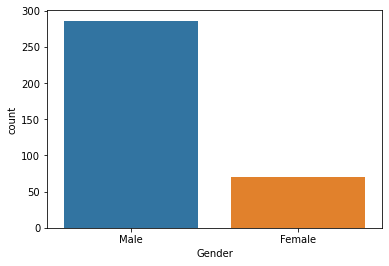

In [35]:
sns.countplot('Gender',data=test_data)

In [36]:
test_data['Gender'][test_data['Gender'].isnull()]='Male'

<ipython-input-36-b82b8a2c6758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Gender'][test_data['Gender'].isnull()]='Male'


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

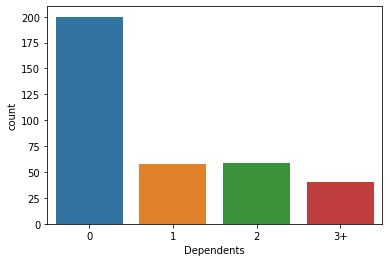

In [37]:
sns.countplot('Dependents',data=test_data)

In [38]:
test_data['Dependents'][test_data['Dependents'].isnull()]=0

<ipython-input-38-57623aee8f93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Dependents'][test_data['Dependents'].isnull()]=0


In [39]:
test_data.loc[test_data.Dependents=='3+','Dependents']= 4

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

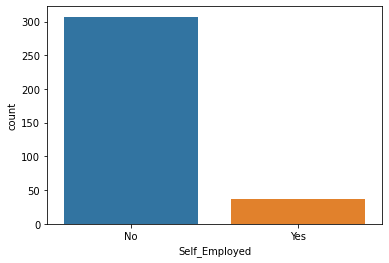

In [40]:
sns.countplot('Self_Employed',data=test_data)

In [41]:
test_data['Self_Employed'][test_data['Self_Employed'].isnull()]='No'

<ipython-input-41-251c9d9541f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Self_Employed'][test_data['Self_Employed'].isnull()]='No'


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

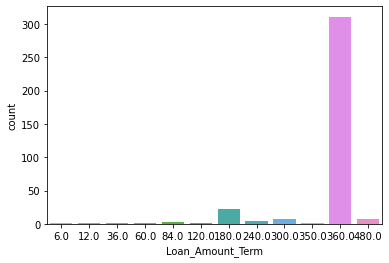

In [42]:
sns.countplot('Loan_Amount_Term',data=test_data)

In [43]:
test_data['Loan_Amount_Term'][test_data['Loan_Amount_Term'].isnull()]=360

<ipython-input-43-16e7ce8aab30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Loan_Amount_Term'][test_data['Loan_Amount_Term'].isnull()]=360


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

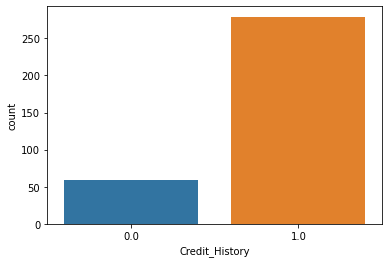

In [44]:
sns.countplot('Credit_History',data=test_data)

In [45]:
test_data['Credit_History'][test_data['Credit_History'].isnull()]=1

<ipython-input-45-44dd997c154b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Credit_History'][test_data['Credit_History'].isnull()]=1


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

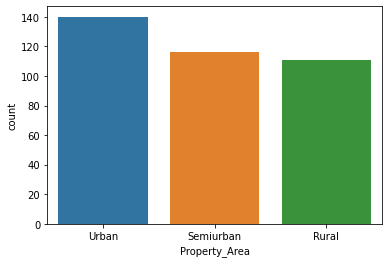

In [46]:
sns.countplot('Property_Area',data=test_data)

In [47]:
test_data['Property_Area'][test_data['Property_Area'].isnull()]='Urban'

<ipython-input-47-4f0a0df87fd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Property_Area'][test_data['Property_Area'].isnull()]='Urban'


In [48]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
test_data['LoanAmount'][test_data['LoanAmount'].isnull()]= test_data['LoanAmount'].mean()

<ipython-input-49-ca28cd53aa04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LoanAmount'][test_data['LoanAmount'].isnull()]= test_data['LoanAmount'].mean()


In [50]:
test_data.loc[test_data.Gender=='Male','Gender']= 0
test_data.loc[test_data.Gender=='Female','Gender']=1

In [51]:
test_data.loc[test_data.Married=='No','Married']= 0
test_data.loc[test_data.Married=='Yes','Married']=1

In [52]:
test_data.loc[test_data.Education=='Graduate','Education']= 0
test_data.loc[test_data.Education=='Not Graduate','Education']=1

In [53]:
test_data.loc[test_data.Self_Employed=='No','Self_Employed']= 0
test_data.loc[test_data.Self_Employed=='Yes','Self_Employed']=1

In [54]:
test_data.loc[test_data.Self_Employed=='No','Self_Employed']= 0
test_data.loc[test_data.Self_Employed=='Yes','Self_Employed']=1

In [55]:
property_area= pd.get_dummies(test_data['Property_Area'],drop_first=True)

In [56]:
test_data = pd.concat([test_data,property_area],axis=1)

In [57]:
X_test_data= test_data.drop(['Loan_ID','Property_Area'],axis=1)

In [58]:
X_test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,1,0,0,0,5720,0,110.0,360.0,1.0,0,1
1,0,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1
2,0,1,2,0,0,5000,1800,208.0,360.0,1.0,0,1
3,0,1,2,0,0,2340,2546,100.0,360.0,1.0,0,1
4,0,0,0,1,0,3276,0,78.0,360.0,1.0,0,1


# Predictions of Test Data

In [59]:
test_data['Loan_Status']= logmodel.predict(X_test_data)

In [60]:
data_frame=test_data[['Loan_ID','Loan_Status']]

In [61]:
data_frame.loc[data_frame.Loan_Status==0,'Loan_Status']='N'
data_frame.loc[data_frame.Loan_Status==1,'Loan_Status']='Y'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
data_frame.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [66]:
print(data_frame.groupby(['Loan_Status']).Loan_Status.count())

Loan_Status
N     57
Y    310
Name: Loan_Status, dtype: int64


In [63]:
data_frame.to_csv('Loan Predictions Submission.csv',index=0)